In [1]:
'''
Nama  : Rabby Fitriana Adawiyah
NIM   : 1101202505
Kelas : TT-44-04
'''

'\nNama  : Rabby Fitriana Adawiyah\nNIM   : 1101202505\nKelas : TT-44-04\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Read CSV
data = pd.read_csv('Dengue_Daily_EN.csv', sep=',', low_memory=False)

<BarContainer object of 22 artists>

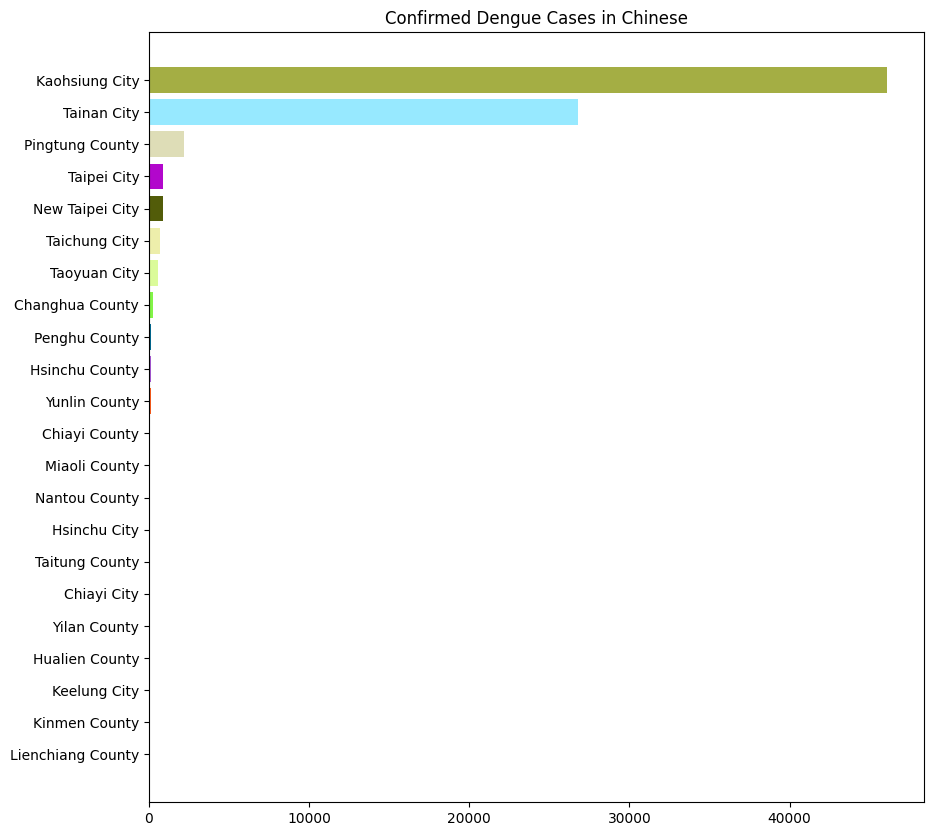

In [9]:
'''(1A) Jumlah Kasus Setiap Negara'''
#menyatukan (grouping) data county_living dan Number_of_confirmed_cases
county_group = data.groupby('County_living').agg({'Number_of_confirmed_cases': 'sum'}).reset_index()

# sorting data Number_of_confirmed_cases dari paling tinggi
county_group = county_group.sort_values(by='Number_of_confirmed_cases', ascending=True)

# Ploting data ke plot BAR (dibuat horizontally)
plt.figure(figsize=(10,10))
plt.title( 'Confirmed Dengue Cases in Chinese' )
plt.barh(county_group['County_living'], county_group['Number_of_confirmed_cases'], color=np.random.rand(len(county_group['County_living']), 3))


<BarContainer object of 19 artists>

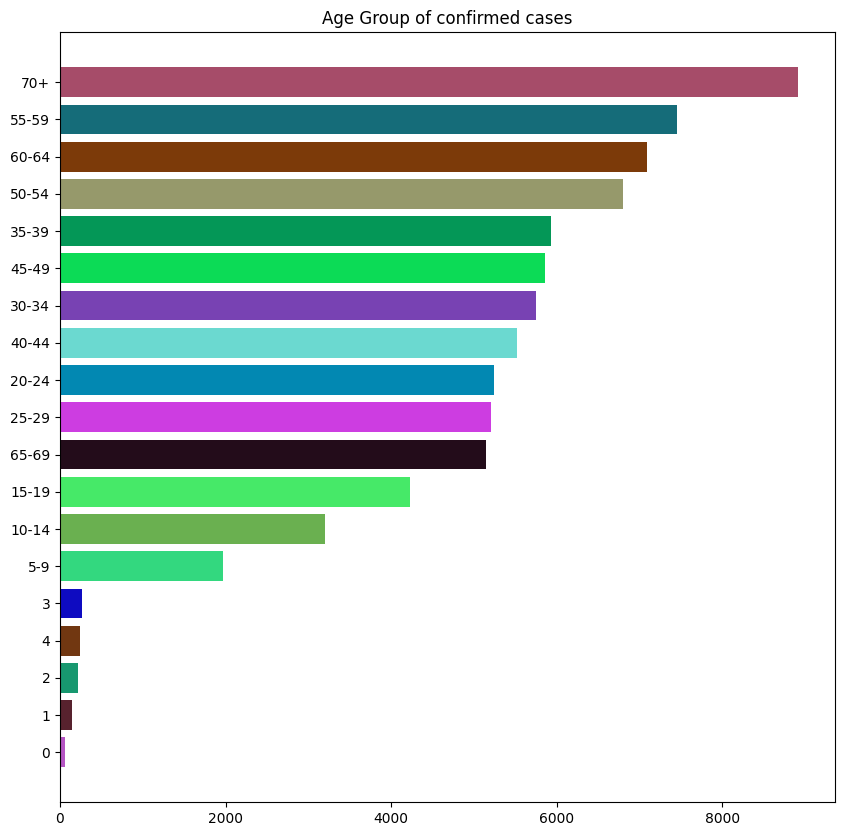

In [12]:
'''(1C) Jumlah Kasus Setiap Grup Umur'''
#grouping "Number_of_confirmed_cases" and "Age_Group"
age_group = data.groupby('Age_Group').agg({'Number_of_confirmed_cases': 'sum'}).reset_index()

# sorting datanya supaya dari tinggi ke rendah
age_group = age_group.sort_values(by='Number_of_confirmed_cases', ascending=True)

# Ploting data ke plot BAR (dibuat horizontally)
plt.figure(figsize=(10,10))
plt.title( 'Age Group of confirmed cases' )
plt.barh(age_group['Age_Group'], age_group['Number_of_confirmed_cases'], color=np.random.rand(len(age_group['Age_Group']), 3))

In [15]:
'''(2) Plot Jumlah Kasus per Bulan dan Bulan apa paling banyak terjadi kasus'''
#Konversi data_onset supaya di ambil bulannya saja
data['Date_Onset'] = pd.to_datetime(data['Date_Onset'])
data['Month'] = data['Date_Onset'].dt.strftime('%Y')

# sorting data
date_group = data.groupby('Month').agg({'Number_of_confirmed_cases': 'sum'}).reset_index().sort_values(by='Month', ascending=True)

# membuat plot berbentuk Tabel
df = pd.DataFrame(date_group)

#membuat highlight color untuk menunjukan bulan yang paling banyak terjadi kasus
def kolom(column):

    highlight = 'background-color: yellow;'
    default = ''

    kolom = column.max()

    return [highlight if v == kolom else default for v in column]

df.style.apply(kolom, subset=['Month','Number_of_confirmed_cases'], axis=0)


,Month,Number_of_confirmed_cases
0,1998,344
1,1999,68
2,2000,139
3,2001,281
4,2002,5388
5,2003,145
6,2004,427
7,2005,306
8,2006,1074
9,2007,2179


In [19]:
'''(3) Menghitung yang menunjukkan jumlah kasus setiap tahun'''

#konversi data_onset supaya di ambil tahunnya saja
data['Date_Onset'] = pd.to_datetime(data['Date_Onset'])
data['Year'] = data['Date_Onset'].dt.strftime('%Y')

#menggrupkan data Tahun ('year') dan ('Number_of_confirmed_cases')
date_group = data.groupby('Year').agg({'Number_of_confirmed_cases': 'sum'}).reset_index().sort_values(by='Year', ascending=True)

df2 = pd.DataFrame(date_group)
df2['total'] = df2['Number_of_confirmed_cases'].sum()
print(df2)

    Year  Number_of_confirmed_cases  total
0   1998                        344  79259
1   1999                         68  79259
2   2000                        139  79259
3   2001                        281  79259
4   2002                       5388  79259
5   2003                        145  79259
6   2004                        427  79259
7   2005                        306  79259
8   2006                       1074  79259
9   2007                       2179  79259
10  2008                        714  79259
11  2009                       1052  79259
12  2010                       1896  79259
13  2011                       1702  79259
14  2012                       1478  79259
15  2013                        860  79259
16  2014                      15732  79259
17  2015                      43784  79259
18  2016                        744  79259
19  2017                        343  79259
20  2018                        533  79259
21  2019                         70  79259
